# To run this:
```
$ virtualenv env
$ source env/bin/activate
$ pip install jupyter notebook pandas numpy matplotlib
$ jupyter notebook
```
Then navigate in browswer to localhost:8888 and open this file.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df = pd.read_csv("/Users/andrewsturges/Downloads/Intervention Severity Metrics - Sheet1.csv")
df['mph'] = df.Velocity * 2.23694
df.head()

,Unnamed: 0,Log,Unnamed: 2,Unnamed: 3,Unnamed: 4,GPS Time,Takeover,Velocity,Init Steer Angle,Lat,...,Average Decel,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,mph
0,log_info,/mnt/logs/BLUE/av/2016.08/2016.08.31/BORON01/1...,config,3,metrics,1156688811,DBW: Accelerator driver input detected.,4.357879,-27.559999,-79.987,...,0.049,3,NaN,[1] 3 1 4 1 2 4 1 1 3 1 4 4 4 4 1 1 2 3 3 3 1 ...,NaN,NaN,NaN,NaN,NaN,9.748313
1,log_info,/mnt/logs/BLUE/av/2016.08/2016.08.31/BORON01/1...,config,3,metrics,1156689004,DBW: Brake driver input detected via the pedal...,1.886614,-166.539993,-79.994,...,0.138,1,NaN,[76] 3 3 1 3 3 2 1 3 3 3 3 3 1 1 3 3 1 3 1 2 3...,NaN,NaN,NaN,NaN,NaN,4.220242
2,log_info,/mnt/logs/BLUE/av/2016.08/2016.08.31/BORON01/1...,config,3,metrics,1156701813,DBW: Accelerator driver input detected.,2.222736,163.559998,-79.976,...,0.000,4,NaN,[151] 2 3 3 3 4 1 3 1 1 3 3 4 3 3 3 1 1 2 1 4 ...,NaN,NaN,NaN,NaN,NaN,4.972127
3,log_info,/mnt/logs/BLUE/av/2016.08/2016.08.31/BORON01/1...,config,3,metrics,1156701926,DBW: Accelerator driver input detected.,4.695340,-10.160000,-79.978,...,0.027,1,NaN,[226] 4 3 3 2 3 1 1 3 2 1 2 3 3 1 2 2 1 3 3 3 ...,NaN,NaN,NaN,NaN,NaN,10.503193
4,log_info,/mnt/logs/BLUE/av/2016.08/2016.08.31/BORON01/1...,config,3,metrics,1156702107,DBW: Accelerator driver input detected.,11.413283,8.580000,-79.959,...,0.307,2,NaN,[301] 1 3 3 3 3 1 1 3 3 1 4 3 1 3 4 1 2 3 4 3 ...,NaN,NaN,NaN,NaN,NaN,25.530829


In [71]:
df.Takeover.value_counts()

DBW: Accelerator driver input detected.                                                   842
DBW: Autosig was lost, hardware opened the chain (mushroom button may be pushed down).    460
DBW: Brake driver input detected via the pedal position.                                  149
DBW: Steering driver input detected from the Elmo.                                        136
DBW: The steering wheel velocity was too high when in computer control.                    24
DBW: Steering driver input detected from the steering module.                               1
Name: Takeover, dtype: int64

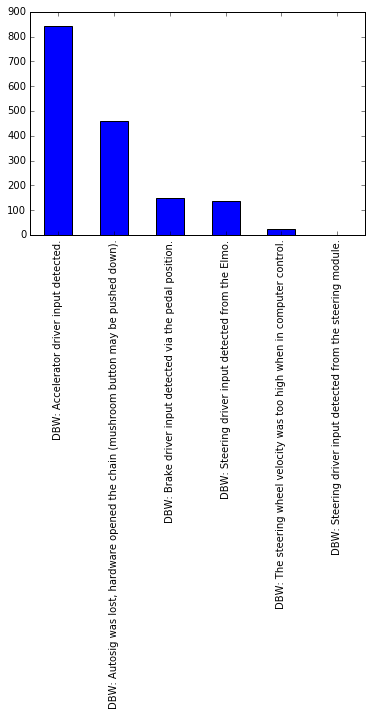

In [72]:
df.Takeover.value_counts().plot(kind='bar')

In [73]:
fields = ['GPS Time', 'Takeover', 'Velocity', 'Init Steer Angle', 'Lat', 'Long', 'Peak Steering', 'Average Steering',
          'Peak Accel', 'Average Accel', 'Average Decel', 'Peak Decel']

In [74]:
df[fields].head()

,GPS Time,Takeover,Velocity,Init Steer Angle,Lat,Long,Peak Steering,Average Steering,Peak Accel,Average Accel,Average Decel,Peak Decel
0,1156688811,DBW: Accelerator driver input detected.,4.357879,-27.559999,-79.987,40.449,67.473,15.333,0.262,0.065,0.049,0.519
1,1156689004,DBW: Brake driver input detected via the pedal...,1.886614,-166.539993,-79.994,40.445,215.334,66.207,1.315,0.251,0.138,0.958
2,1156701813,DBW: Accelerator driver input detected.,2.222736,163.559998,-79.976,40.458,93.312,41.773,2.721,1.118,0.000,0.000
3,1156701926,DBW: Accelerator driver input detected.,4.695340,-10.160000,-79.978,40.454,164.271,53.653,1.479,0.444,0.027,0.462
4,1156702107,DBW: Accelerator driver input detected.,11.413283,8.580000,-79.959,40.463,29.942,6.687,1.745,0.177,0.307,2.375


# Speed
Most takeover events happen at low speeds.

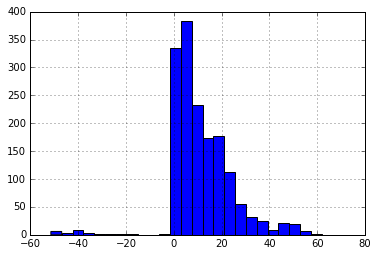

In [75]:
df.mph.hist(bins=25)

# Steering
Most takeover events happen while driving straight.

Define a "sudden steering event" as any time peak steering exceeds the mean of peak steering.

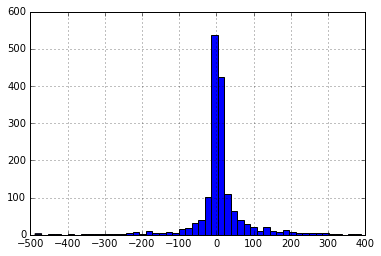

In [76]:
df['Init Steer Angle'].hist(bins=50)

In [77]:
df['Peak Steering'].describe()

count    1612.000000
mean       81.880024
std       107.087019
min         0.000000
25%        15.791000
50%        38.760500
75%       101.931750
max       726.251000
Name: Peak Steering, dtype: float64

In [78]:
df['Peak Steering'].median()

38.76049999999999

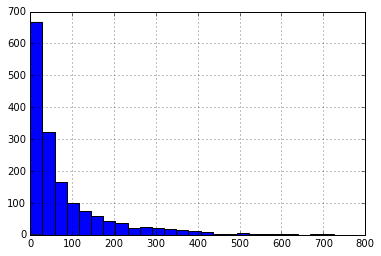

In [79]:
df['Peak Steering'].hist(bins=25, log=False)

In [80]:
df['sudden_steering_event'] = df['Peak Steering'] > df['Peak Steering'].mean()

# Acceleration
Accerlation ranges from zero, mostly, to 3.5 meters/second/second.
Define sudden_accel_event as any time Peak Accel > median.

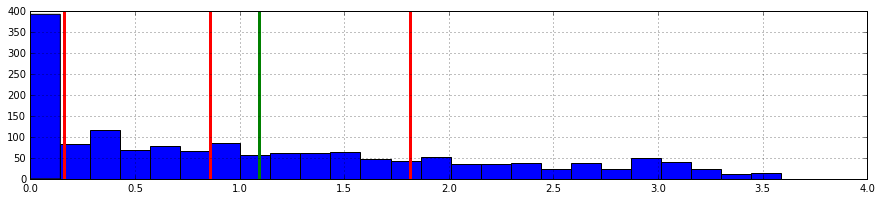

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
df['Peak Accel'].hist(bins=25, ax=ax)
ax.axvline(np.percentile(df['Peak Accel'], 25), color='red', lw=3)
ax.axvline(np.percentile(df['Peak Accel'], 50), color='red', lw=3)
ax.axvline(np.percentile(df['Peak Accel'], 75), color='red', lw=3)
ax.axvline(np.mean(df['Peak Accel']), color='green', lw=3)

In [82]:
df['sudden_accel_event'] = df['Peak Accel'] > np.percentile(df['Peak Accel'], 50)

# Braking

Define sudden_braking_event as any peak decel > mean

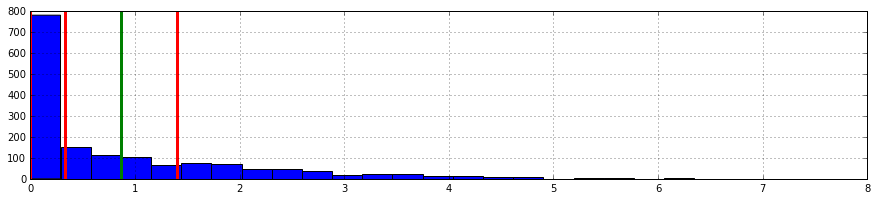

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
df['Peak Decel'].hist(bins=25, ax=ax)
ax.axvline(np.percentile(df['Peak Decel'], 25), color='red', lw=3)
ax.axvline(np.percentile(df['Peak Decel'], 50), color='red', lw=3)
ax.axvline(np.percentile(df['Peak Decel'], 75), color='red', lw=3)
ax.axvline(np.mean(df['Peak Decel']), color='green', lw=3)

In [84]:
df['sudden_braking_event'] = df['Peak Decel'] > df['Peak Decel'].mean()

In [85]:
df.head()

,Unnamed: 0,Log,Unnamed: 2,Unnamed: 3,Unnamed: 4,GPS Time,Takeover,Velocity,Init Steer Angle,Lat,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,mph,sudden_steering_event,sudden_accel_event,sudden_braking_event
0,log_info,/mnt/logs/BLUE/av/2016.08/2016.08.31/BORON01/1...,config,3,metrics,1156688811,DBW: Accelerator driver input detected.,4.357879,-27.559999,-79.987,...,[1] 3 1 4 1 2 4 1 1 3 1 4 4 4 4 1 1 2 3 3 3 1 ...,NaN,NaN,NaN,NaN,NaN,9.748313,False,False,False
1,log_info,/mnt/logs/BLUE/av/2016.08/2016.08.31/BORON01/1...,config,3,metrics,1156689004,DBW: Brake driver input detected via the pedal...,1.886614,-166.539993,-79.994,...,[76] 3 3 1 3 3 2 1 3 3 3 3 3 1 1 3 3 1 3 1 2 3...,NaN,NaN,NaN,NaN,NaN,4.220242,True,True,True
2,log_info,/mnt/logs/BLUE/av/2016.08/2016.08.31/BORON01/1...,config,3,metrics,1156701813,DBW: Accelerator driver input detected.,2.222736,163.559998,-79.976,...,[151] 2 3 3 3 4 1 3 1 1 3 3 4 3 3 3 1 1 2 1 4 ...,NaN,NaN,NaN,NaN,NaN,4.972127,True,True,False
3,log_info,/mnt/logs/BLUE/av/2016.08/2016.08.31/BORON01/1...,config,3,metrics,1156701926,DBW: Accelerator driver input detected.,4.695340,-10.160000,-79.978,...,[226] 4 3 3 2 3 1 1 3 2 1 2 3 3 1 2 2 1 3 3 3 ...,NaN,NaN,NaN,NaN,NaN,10.503193,True,True,False
4,log_info,/mnt/logs/BLUE/av/2016.08/2016.08.31/BORON01/1...,config,3,metrics,1156702107,DBW: Accelerator driver input detected.,11.413283,8.580000,-79.959,...,[301] 1 3 3 3 3 1 1 3 3 1 4 3 1 3 4 1 2 3 4 3 ...,NaN,NaN,NaN,NaN,NaN,25.530829,False,True,True


In [94]:
counts = df.groupby(by=['sudden_braking_event', 'sudden_steering_event', 'sudden_accel_event']).count()[['Log']]

In [104]:
counts/df.shape[0]

Log
sudden_braking_event sudden_steering_event sudden_accel_event          
False                False                 False               0.152605
                                           True                0.267370
                     True                  False               0.049628
                                           True                0.178660
True                 False                 False               0.238834
                                           True                0.039702
                     True                  False               0.058933
                                           True                0.014268

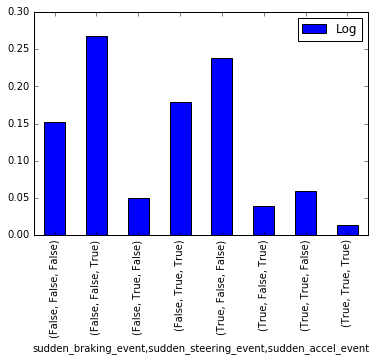

In [103]:
(counts/df.shape[0]).plot(kind='bar')